In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:03<00:00, 20.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
import os

print(os.listdir(path))

['creditcard.csv']


In [ ]:
import pandas as pd

df = pd.read_csv(os.path.join(path,'creditcard.csv'))

df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#FILLING MISSING VALUES
df["Amount"].fillna(df["Amount"].mean(), inplace=True)

<ipython-input-6-3ce190cd77d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(df["Amount"].mean(), inplace=True)


In [ ]:
#FRAUD VS NON FRAUD TSN
#fraud = 1

df["Class"].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#checking for num description, this is done to see if there are any significant changes in data
#This may indcate frauds
#CHECK FOR V1 to V 28 valyes , a large diff between min n max may indiacte a fraud

pd.options.display.float_format = '{:.6f}'.format  # Display up to 6 decimal places

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
df["Amount"].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [ ]:
#Now we check if fraud transactions have a higher cost
#This means, fraudsters are buying high cist products
#Fraud transactions have a higher mean (122.21 vs. 88.29) → Fraudsters tend to spend more.
#Max fraud amount is 2125.87, much lower than non-fraud (25691.16) → Some non-fraud transactions are much larger.
#Fraud transactions have a lower median (50%) → Most frauds are smaller transactions, but some are high.

df.groupby("Class")["Amount"].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.000000,88.291022,250.105092,0.000000,5.650000,22.000000,77.050000,25691.160000
1,492.000000,122.211321,256.683288,0.000000,1.000000,9.250000,105.890000,2125.870000


<ipython-input-11-47c372914a4a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df["Class"], palette="coolwarm")


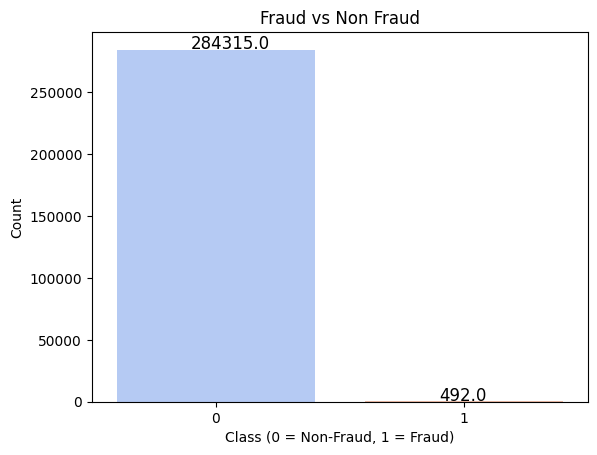

In [ ]:
#VISUALIZE
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=df["Class"], palette="coolwarm")

for p in ax.patches:
  ax.annotate(f'{p.get_height()}',(p.get_x()+0.3, p.get_height()+500),fontsize = 12)



plt.title("Fraud vs Non Fraud")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

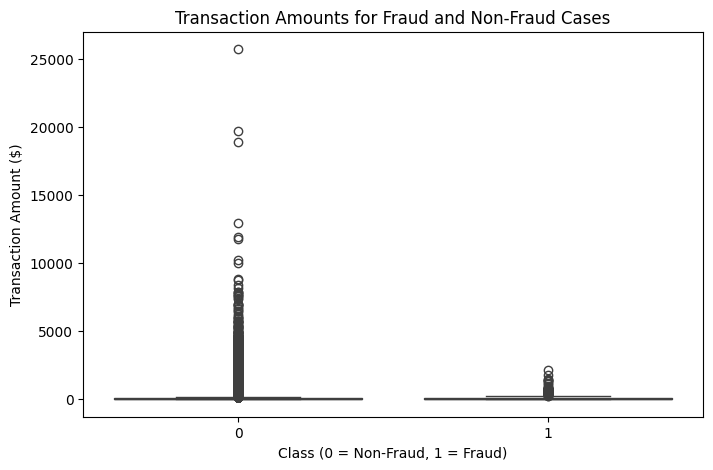

In [ ]:
plt.figure(figsize=(8, 5))

sns.boxplot(x=df["Class"],y=df["Amount"])
plt.title("Transaction Amounts for Fraud and Non-Fraud Cases")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount ($)")
plt.show()

<Axes: xlabel='Class', ylabel='Amount'>

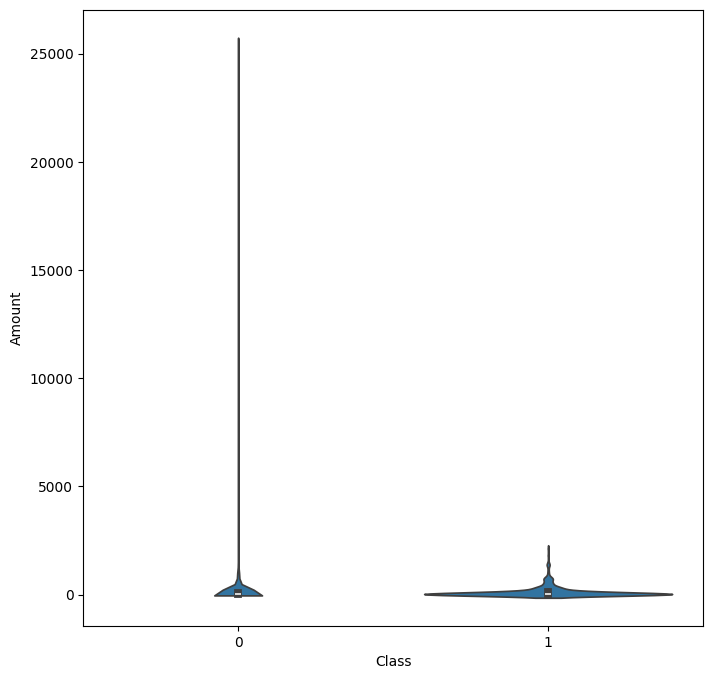

In [ ]:
plt.figure(figsize=(8,8))

sns.violinplot(x=df["Class"], y=df["Amount"])

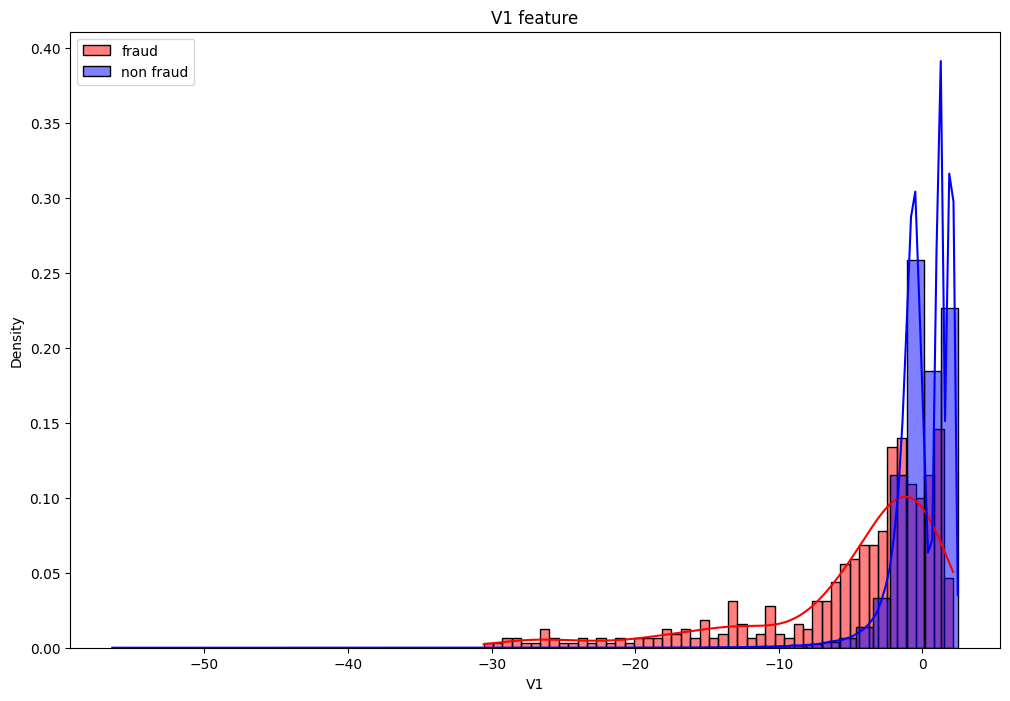

In [ ]:
#Seperate fraud n non fraud
fraud = df[df["Class"]==1]
non_fraud = df[df["Class"]==0]

#COMPARISON FOR FEATURE V1
plt.figure(figsize=(12,8))

sns.histplot(fraud["V1"], label="fraud", color="red", kde= True, stat="density",bins=50) #Stat is useful when one att freq is very less
sns.histplot(non_fraud["V1"], label="non fraud", color="blue", kde= True, stat="density",bins=50)

plt.legend()
plt.title("V1 feature")
plt.show()

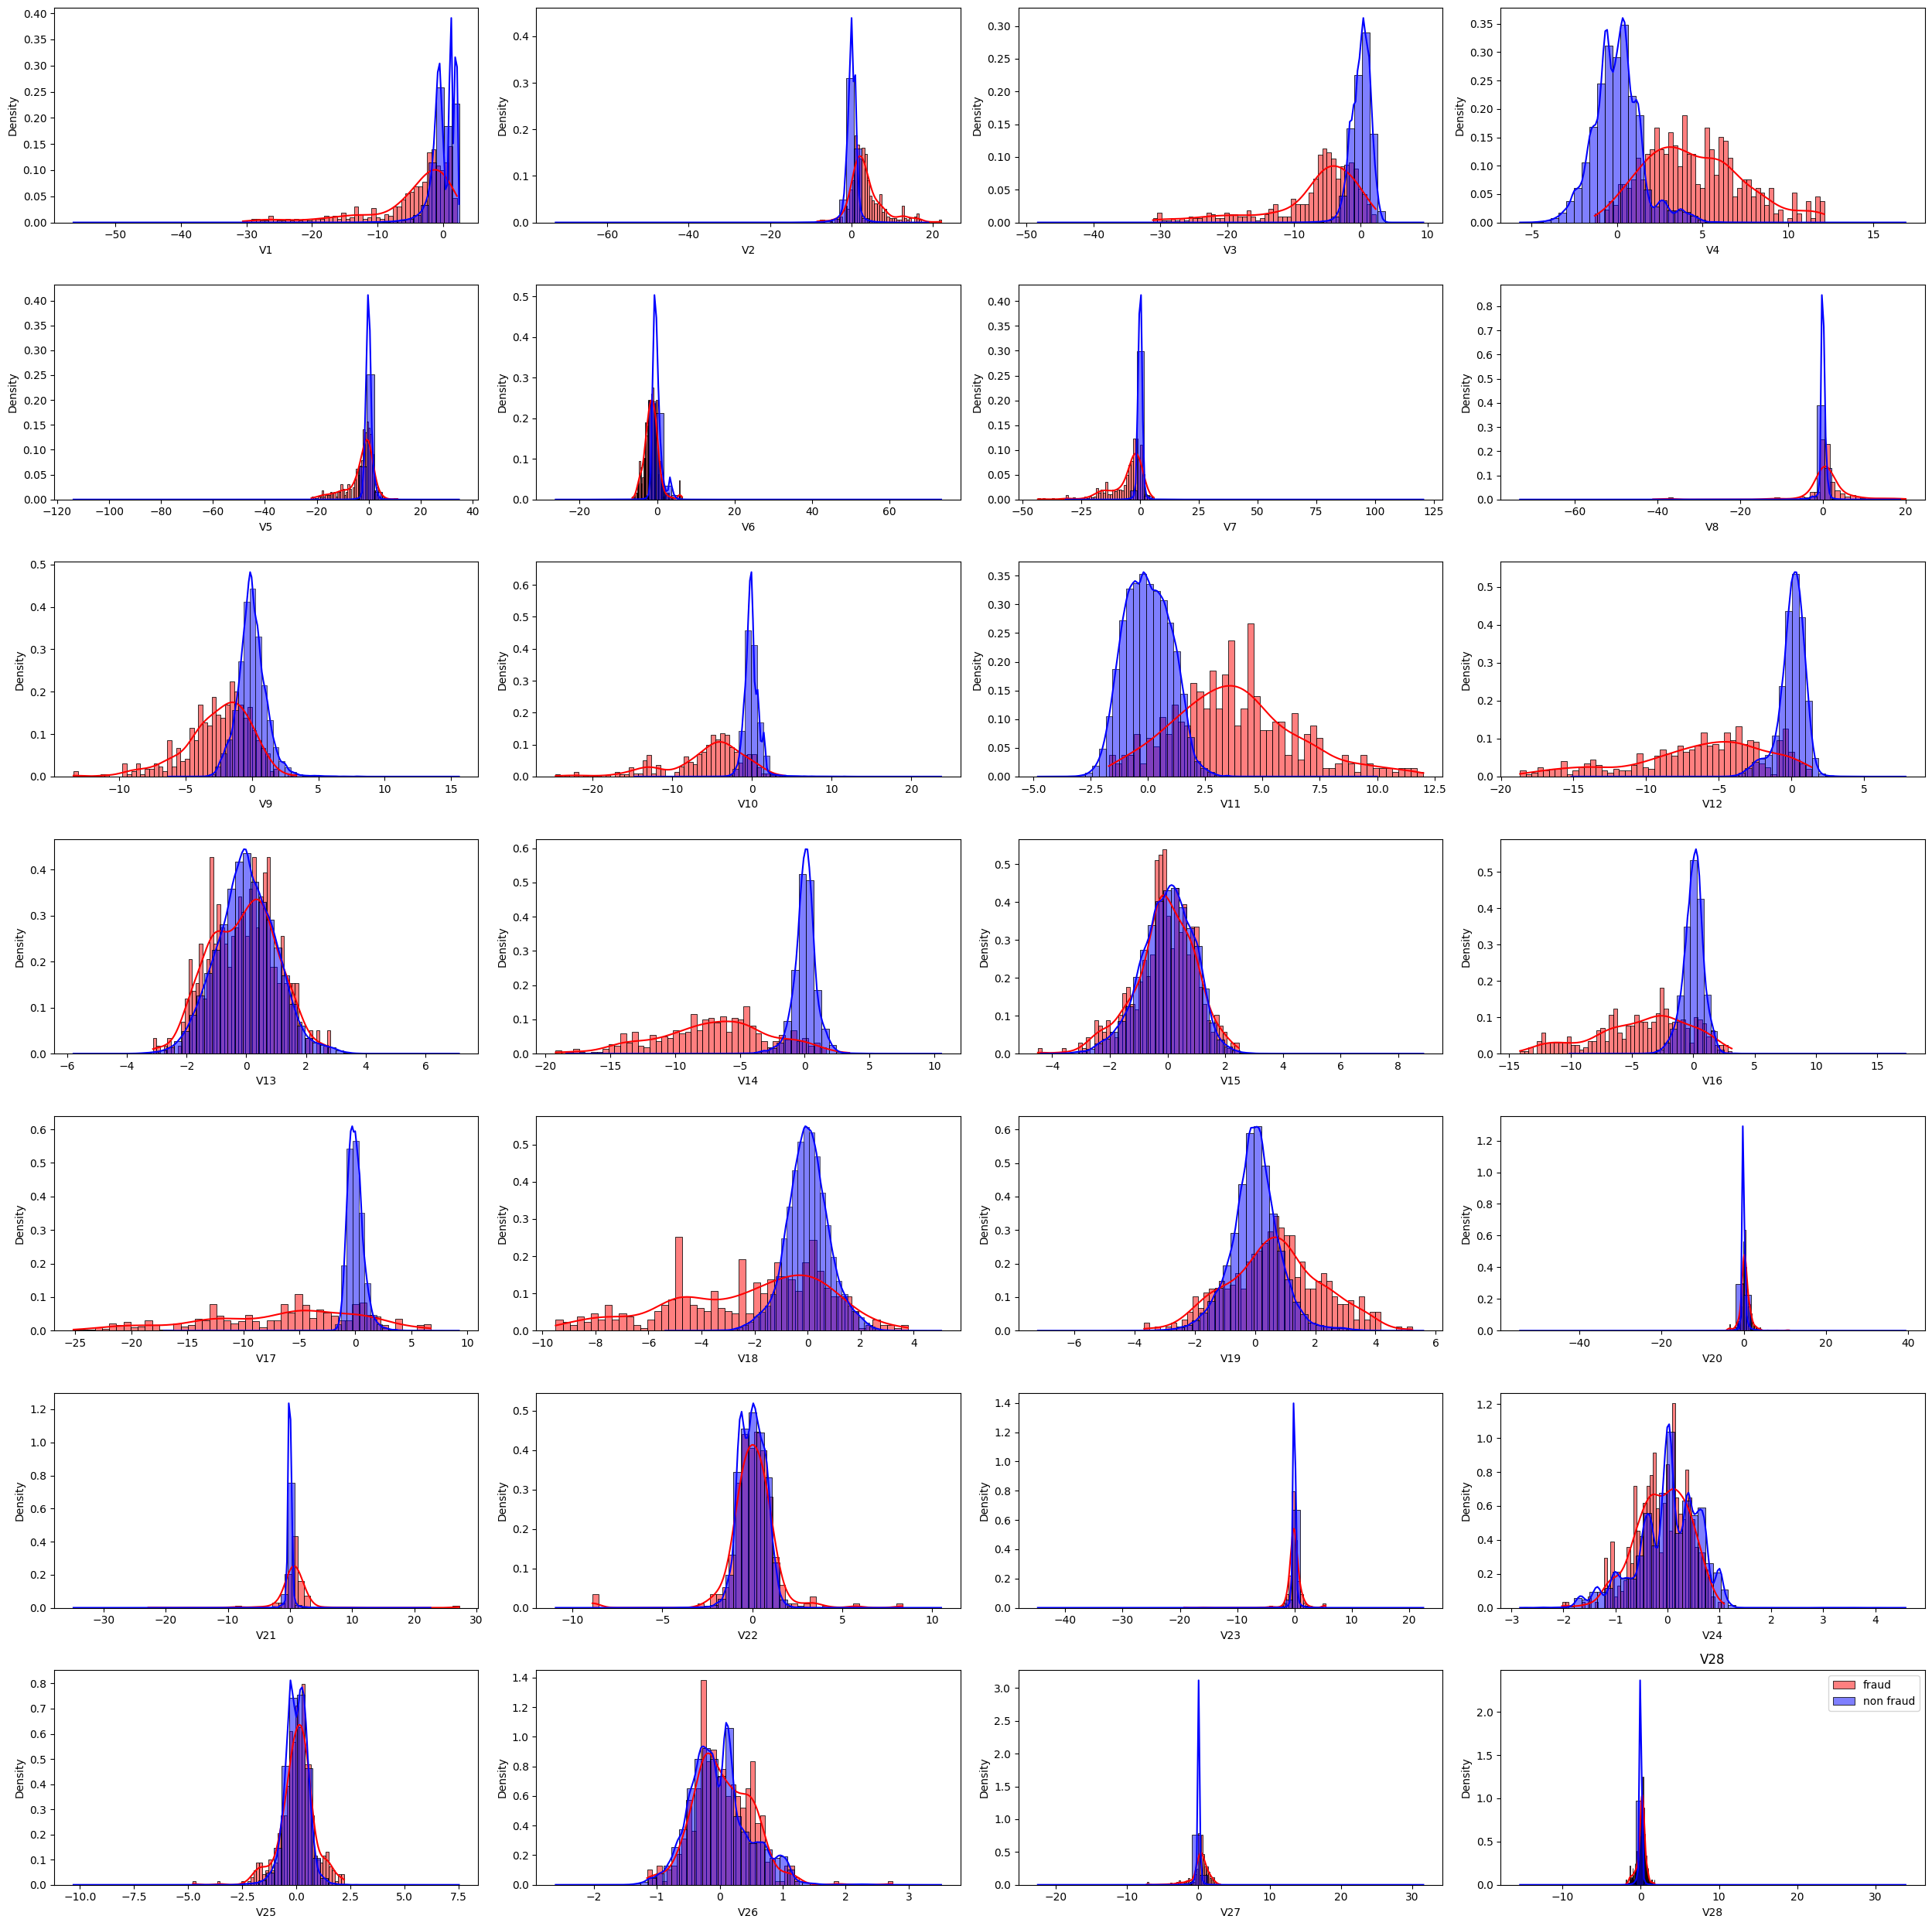

In [ ]:
#making histoplots for all features

features = df.columns[1:-2]
plt.figure(figsize=(25,25))

for i , feature in enumerate(features,1):
  plt.subplot(7,4,i) #grid of 7x4

  sns.histplot(fraud[feature], label="fraud", color="red", kde= True, stat="density",bins=50)
  sns.histplot(non_fraud[feature], label="non fraud", color="blue", kde= True, stat="density",bins=50)

plt.legend()
plt.title(feature)

plt.tight_layout()
plt.show()


In [ ]:
"""Analyze Feature Distributions
Look at the histograms and try to answer these:

Do fraud and non-fraud transactions have different distributions for any feature?
Are there features where fraud cases are more concentrated in certain value ranges?
Are there features that are almost the same for both fraud and non-fraud transactions?
If so, they might not be useful for fraud detection."""

#WE NEED FEATURES FOR WHICH FRAUD AND NON FRAUD VALUES DIFFER SIGNIFIACNTLY

'Analyze Feature Distributions\nLook at the histograms and try to answer these:\n\nDo fraud and non-fraud transactions have different distributions for any feature?\nAre there features where fraud cases are more concentrated in certain value ranges?\nAre there features that are almost the same for both fraud and non-fraud transactions?\nIf so, they might not be useful for fraud detection.'

In [ ]:
#Corelation BETWEEN FEATURES
"""Feature Selection → If two features are highly correlated (close to +1 or -1), one may be redundant, so we might drop it later.
Fraud Detection → If any feature has a high correlation with "Class", it could be useful in detecting fraud."""

correlation = df.corr()
print(df.corr()["Class"].sort_values(ascending=False))# SHOWS FEAT most corel with fraud class ie class =1

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


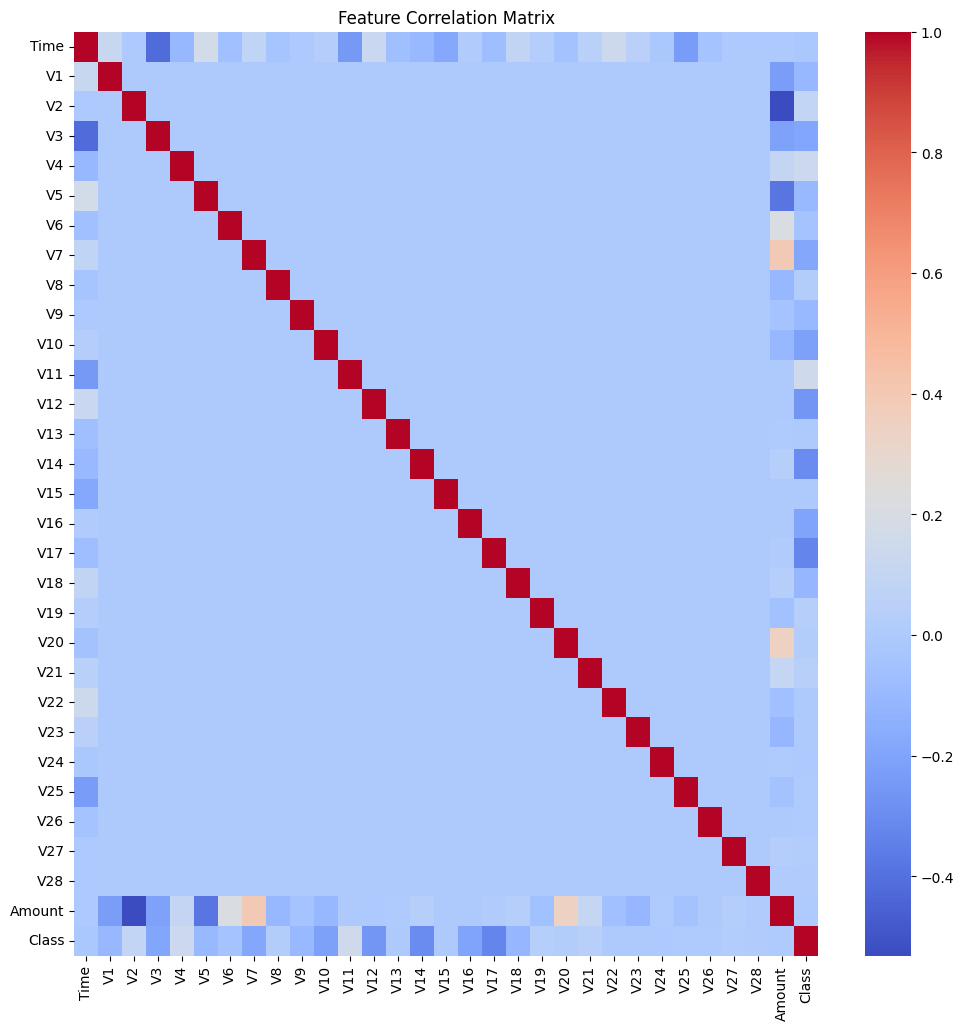

'overall, the low correlations mean we cannot rely on just one feature—we need to use multiple features together in a model.\nThis also confirms that fraudulent transactions do not have simple patterns and require machine learning models to detect complex relationships.'

In [ ]:
#VISULAIZE a heat map

plt.figure(figsize = (12,12))

sns.heatmap(correlation, cmap = "coolwarm", annot = False, fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


"""Dark red cells → High positive correlation (close to +1).
Dark blue cells → High negative correlation (close to -1).
Lighter colors → Weaker correlation."""


"""Do any features have high correlation with Class?
Are there features highly correlated with each other? (We might remove some later.)"""


"""overall, the low correlations mean we cannot rely on just one feature—we need to use multiple features together in a model.
This also confirms that fraudulent transactions do not have simple patterns and require machine learning models to detect complex relationships."""

In [ ]:
#data preprocessing

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #create object

df[['Time','Amount']] = scaler.fit_transform(df[['Time','Amount']])

"""StandardScaler standardizes the data so that it has a mean of 0 and a standard deviation of 1.
This prevents larger numerical values (like transaction amounts) from dominating the model’s learning process.
V1 to V28 are already transformed (from PCA in the original dataset), so we only need to scale Time and Amount."""


'StandardScaler standardizes the data so that it has a mean of 0 and a standard deviation of 1.\nThis prevents larger numerical values (like transaction amounts) from dominating the model’s learning process.\nV1 to V28 are already transformed (from PCA in the original dataset), so we only need to scale Time and Amount.'

In [ ]:
#TRAINING THE MODE:

#SPLIT IN TRAINING N TEST DATASET

from sklearn.model_selection import train_test_split

x = df.drop(columns=["Class"]) # since class is target
y = df["Class"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
"""Since fraudulent transactions (Class 1) are very rare, our model might learn to predict only non-fraudulent transactions. To fix this, we can:

Undersample the majority class (randomly remove non-fraud transactions).
Oversample the minority class (duplicate fraud transactions).
Use SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic fraud samples.
We’ll use SMOTE, as it’s a better approach than simple oversampling."""


'Since fraudulent transactions (Class 1) are very rare, our model might learn to predict only non-fraudulent transactions. To fix this, we can:\n\nUndersample the majority class (randomly remove non-fraud transactions).\nOversample the minority class (duplicate fraud transactions).\nUse SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic fraud samples.\nWe’ll use SMOTE, as it’s a better approach than simple oversampling.'

In [ ]:
print(y.dtype)
print(y[:5])

int64
0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

#apply smoteto training set
smote = SMOTE(random_state=42)
x_train_re , y_train_re = smote.fit_resample(x_train,y_train)

print(y_train.value_counts())
print(y_train_re.value_counts())

Class
0    227451
1       394
Name: count, dtype: int64
Class
0    227451
1    227451
Name: count, dtype: int64


In [ ]:
"""We'll train three models and compare their performance:

Logistic Regression (Baseline model)
Random Forest (Good for feature importance & accuracy)
XGBoost (Powerful gradient boosting model)
"""

"We'll train three models and compare their performance:\n\nLogistic Regression (Baseline model)\nRandom Forest (Good for feature importance & accuracy)\nXGBoost (Powerful gradient boosting model)\n"

In [ ]:
#Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

log = LogisticRegression()
log.fit(x_train_re, y_train_re)

y_pred_log = log.predict(x_test)

print("Logistic Regression performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


Logistic Regression performance:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Accuracy: 0.9742635441171307


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train_re,y_train_re)

y_rf = rf.predict(x_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_rf))
print("Accuracy:", accuracy_score(y_test, y_rf))



Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9994557775359011


In [ ]:
import xgboost as xb

xgb = xb.XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(x_train_re,y_train_re)

y_xb = xgb.predict(x_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_xb))
print("Accuracy:", accuracy_score(y_test, y_xb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9992451107756047


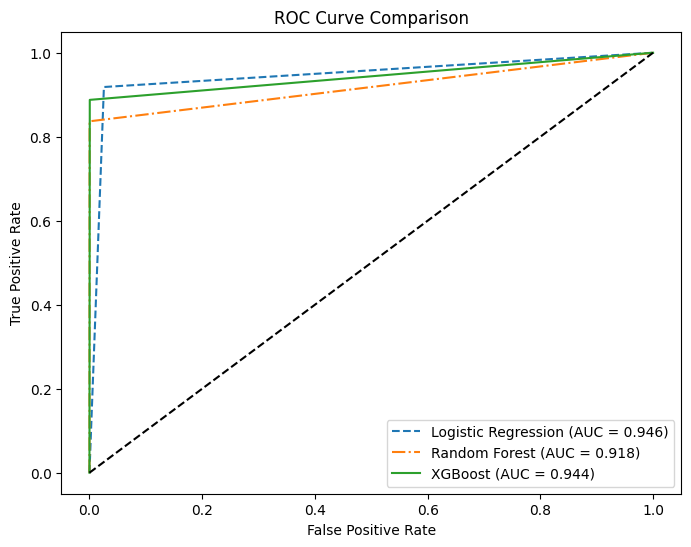

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_log)
auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_xb, tpr_xb, _ = roc_curve(y_test, y_xb)
auc_xb = auc(fpr_xb, tpr_xb)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.3f})', linestyle='--')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linestyle='-.')
plt.plot(fpr_xb, tpr_xb, label=f'XGBoost (AUC = {auc_xb:.3f})', linestyle='-')

# Plot diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [ ]:
# Store results in a dictionary

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

model_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "Precision": precision_score(y_test, y_pred_log),
        "Recall": recall_score(y_test, y_pred_log),
        "AUC-ROC": roc_auc_score(y_test, y_pred_log)
    },
    "Random Forest": {
        "Accuracy": accuracy_score(y_test, y_rf),
        "Precision": precision_score(y_test, y_rf),
        "Recall": recall_score(y_test, y_rf),
        "AUC-ROC": roc_auc_score(y_test, y_rf)
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_xb),
        "Precision": precision_score(y_test, y_xb),
        "Recall": recall_score(y_test, y_xb),
        "AUC-ROC": roc_auc_score(y_test, y_xb)
    }
}

# Convert results to DataFrame and transpose
results_df = pd.DataFrame(model_results).T

# Display results
print(results_df)


                     Accuracy  Precision   Recall  AUC-ROC
Logistic Regression  0.974264   0.058140 0.918367 0.946364
Random Forest        0.999456   0.845361 0.836735 0.918235
XGBoost              0.999245   0.731092 0.887755 0.943596


In [ ]:
"""ogistic Regression has high recall (91.8%) but very low precision (5.8%) → meaning it predicts almost all fraud cases but with too many false positives.
Random Forest has the highest precision (84.5%) and good recall (83.6%), but its AUC-ROC is slightly lower.
XGBoost balances recall and precision well, with a strong recall (88.7%) and decent precision (73.1%).
💡 Best Model?
XGBoost is likely the best choice because it keeps a balance between precision and recall, making it reliable in real-world fraud detection."""

'ogistic Regression has high recall (91.8%) but very low precision (5.8%) → meaning it predicts almost all fraud cases but with too many false positives.\nRandom Forest has the highest precision (84.5%) and good recall (83.6%), but its AUC-ROC is slightly lower.\nXGBoost balances recall and precision well, with a strong recall (88.7%) and decent precision (73.1%).\n💡 Best Model?\nXGBoost is likely the best choice because it keeps a balance between precision and recall, making it reliable in real-world fraud detection.'

In [ ]:
"""Isolation Forest
Isolation Forest is an anomaly detection algorithm that identifies fraud by isolating outliers.

 Steps to Follow:
1️ Import the necessary library.
2️ Train the Isolation Forest model on the dataset.
3️ Predict anomalies and compare with actual fraud cases.
4️ Evaluate performance using precision, recall, and AUC-ROC.

"""

from sklearn.ensemble import IsolationForest

iso_forest  = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)

iso_forest.fit(x_train_re)

# Predict anomalies on test data (-1 = anomaly, 1 = normal)
y_pred_iso = iso_forest.predict(x_test)

# Convert predictions to match our fraud labels (1 for fraud, 0 for non-fraud)
y_pred_iso = [1 if pred == -1 else 0 for pred in y_pred_iso]

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Calculate evaluation metrics
accuracy_iso = accuracy_score(y_test, y_pred_iso)
precision_iso = precision_score(y_test, y_pred_iso)
recall_iso = recall_score(y_test, y_pred_iso)
roc_auc_iso = roc_auc_score(y_test, y_pred_iso)

# Print results line by line
print(f"Isolation Forest - Accuracy: {accuracy_iso:.6f}")
print(f"Isolation Forest - Precision: {precision_iso:.6f}")
print(f"Isolation Forest - Recall: {recall_iso:.6f}")
print(f"Isolation Forest - AUC-ROC: {roc_auc_iso:.6f}")



Isolation Forest - Accuracy: 0.998244
Isolation Forest - Precision: 0.000000
Isolation Forest - Recall: 0.000000
Isolation Forest - AUC-ROC: 0.499982


In [ ]:
"""The Precision and Recall are 0, meaning the model didn't detect any fraud cases.
AUC-ROC of ~0.5 means it's performing like random guessing.
Isolation Forest is unsupervised, and it may not work well on this dataset without fine-tuning.
Since Isolation Forest didn’t perform well, let’s try the next method: Autoencoders.

"""


"The Precision and Recall are 0, meaning the model didn't detect any fraud cases.\nAUC-ROC of ~0.5 means it's performing like random guessing.\nIsolation Forest is unsupervised, and it may not work well on this dataset without fine-tuning.\nSince Isolation Forest didn’t perform well, let’s try the next method: Autoencoders.\n\n"

In [ ]:
""" Autoencoders for Fraud Detection
Autoencoders are deep-learning models used for anomaly detection by learning normal transaction patterns and flagging unusual ones."""

#Step 1: Define the Autoencoder Model


import tensorflow as ts
from tensorflow import keras
from tensorflow.keras import layers

#no of features

input_dim = x_train.shape[1]

autoencoder = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation="relu"),  # Compress data
    layers.Dense(8, activation="relu"),   # Smallest compressed form (bottleneck)
    layers.Dense(16, activation="relu"),  # Expand data back
    layers.Dense(input_dim, activation="sigmoid")  # Output same shape as input
])

#It helps in non-linearity, allowing the model to learn better representations.

autoencoder.compile(optimizer="adam", loss="mse")
#Higher MSE = More likely to be fraud.


#Step 2: Train Autoencoder on Non-Fraud Data
# Train only on normal transactions (y_train == 0)
autoencoder.fit(x_train[y_train == 0], x_train[y_train == 0],
                epochs=10, batch_size=256, shuffle=True, validation_split=0.1)


"""Why only non-fraud transactions?
Fraud cases are too few for the model to learn their pattern.
Instead, we train the model on normal behavior and detect anything that deviates significantly"""



Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0615 - val_loss: 0.8527
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8509 - val_loss: 0.8225
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8460 - val_loss: 0.8145
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.8147 - val_loss: 0.8108
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.8241 - val_loss: 0.8075
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.8156 - val_loss: 0.8054
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.8321 - val_loss: 0.8035
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.8262 - val_loss: 0.8021
Epoch 9/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.7939 - val_loss: 0.8002
Epoch 10/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7982 - val_loss: 0.7993


'Why only non-fraud transactions?\nFraud cases are too few for the model to learn their pattern.\nInstead, we train the model on normal behavior and detect anything that deviates significantly'

In [ ]:
#Step 3: Detect Anomalies
"""Once trained, we use the autoencoder to reconstruct transactions. If the reconstruction error is too high, it is marked as fraud."""

import numpy as np

# Get reconstruction errors
reconstructions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructions, 2), axis=1)  # Mean Squared Error

# Define fraud detection threshold (99th percentile of error)
threshold = np.percentile(mse, 99)

# Predict fraud (1) if error is above threshold, else non-fraud (0)
y_pred_autoencoder = (mse > threshold).astype(int)

"""Why use the 99th percentile as a threshold?
Most normal transactions will have low reconstruction errors.
Fraudulent transactions will have high reconstruction errors.
The top 1% most unusual transactions are flagged as fraud."""

#Step 4: Evaluate Performance

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_autoencoder))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.10      0.59      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.79      0.58     56962
weighted avg       1.00      0.99      0.99     56962

